## Task 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [2]:
customers.head()
products.head()
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [3]:
merged_df = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

## Top Product Categories by Revenue - 1st Insight

C:\Users\siddh\AppData\Local\Temp\ipykernel_12400\3124800159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")


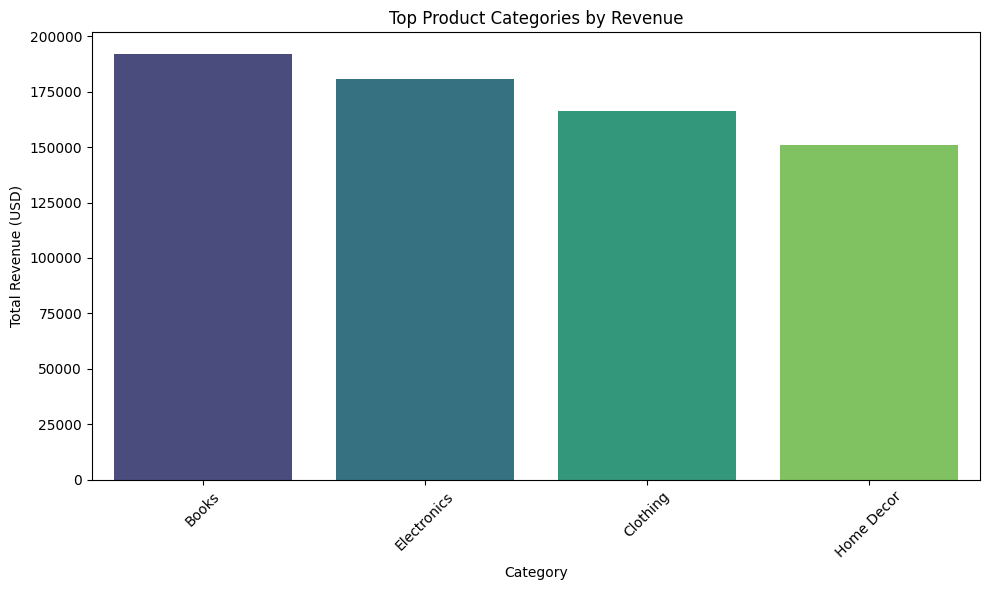

In [4]:
category_revenue = merged_df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")
plt.title("Top Product Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("category_revenue.png")
plt.show()


## Regional Revenue Contribution - 2nd Insight

C:\Users\siddh\AppData\Local\Temp\ipykernel_12400\1678657428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="magma")


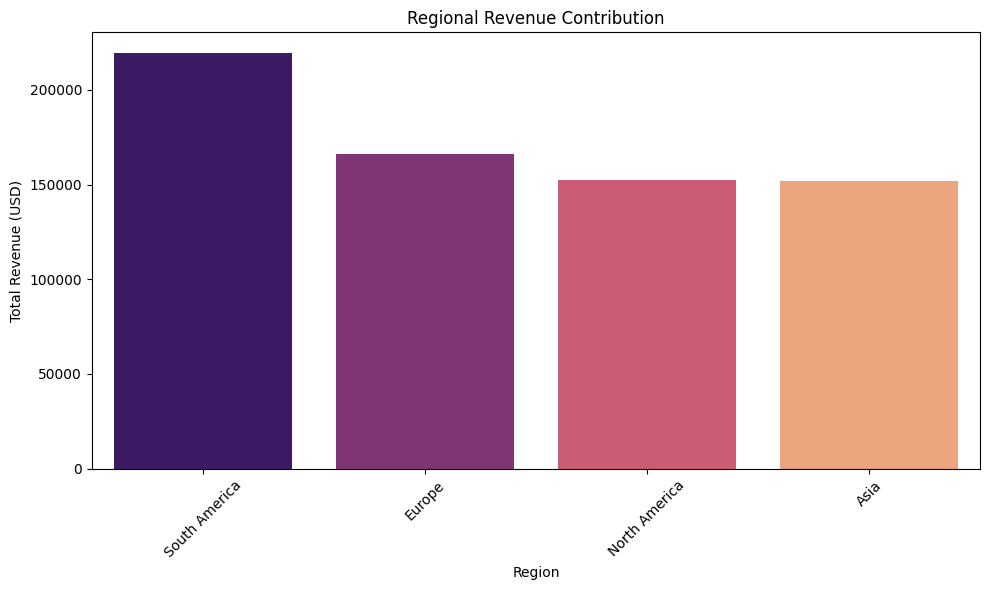

In [5]:
region_revenue = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="magma")
plt.title("Regional Revenue Contribution")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("region_revenue.png")
plt.show()

## Customer Signup Trends - 3rd Insight

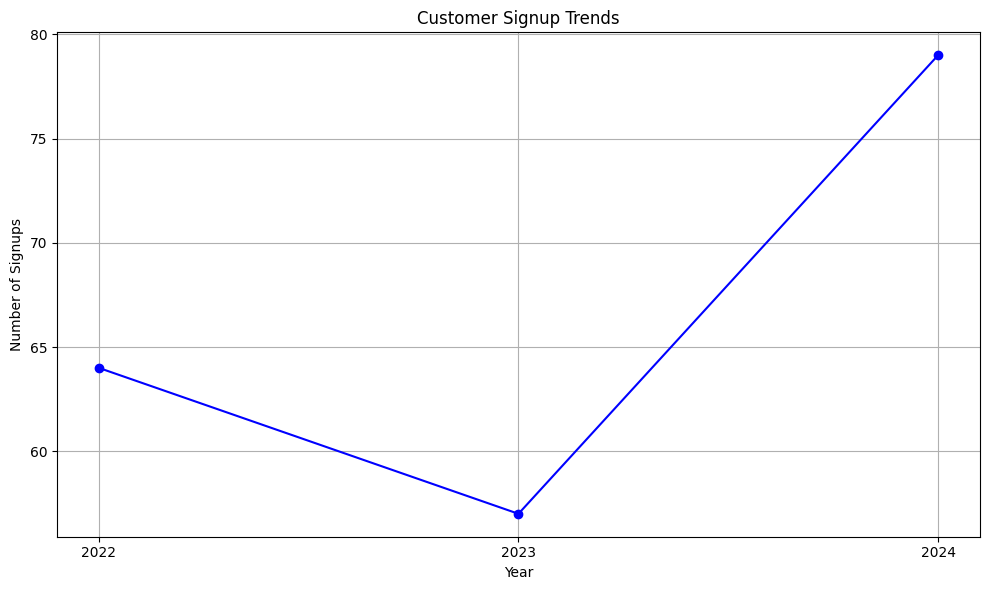

In [6]:
data_signup_trend = customers["SignupDate"].str[:4].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(data_signup_trend.index, data_signup_trend.values, marker="o", color="b")
plt.title("Customer Signup Trends")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.grid(True)
plt.tight_layout()
plt.savefig("signup_trends.png")
plt.show()


## Average Transaction Value per Region - 4th Insight

C:\Users\siddh\AppData\Local\Temp\ipykernel_12400\3850572353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction_value_region.index, y=avg_transaction_value_region.values, palette="coolwarm")


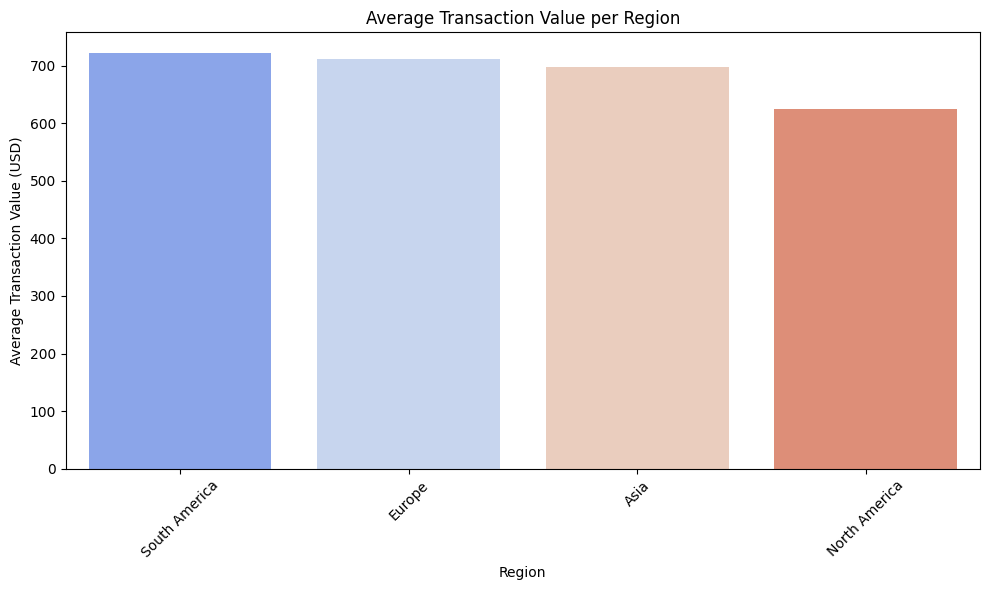

In [7]:
avg_transaction_value_region = merged_df.groupby('Region')["TotalValue"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction_value_region.index, y=avg_transaction_value_region.values, palette="coolwarm")
plt.title("Average Transaction Value per Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_transaction_value_region.png")
plt.show()


## Most Popular Products by Quantity Sold - 5th Insight

C:\Users\siddh\AppData\Local\Temp\ipykernel_12400\3978514637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.values, y=popular_products.index, palette="cubehelix")


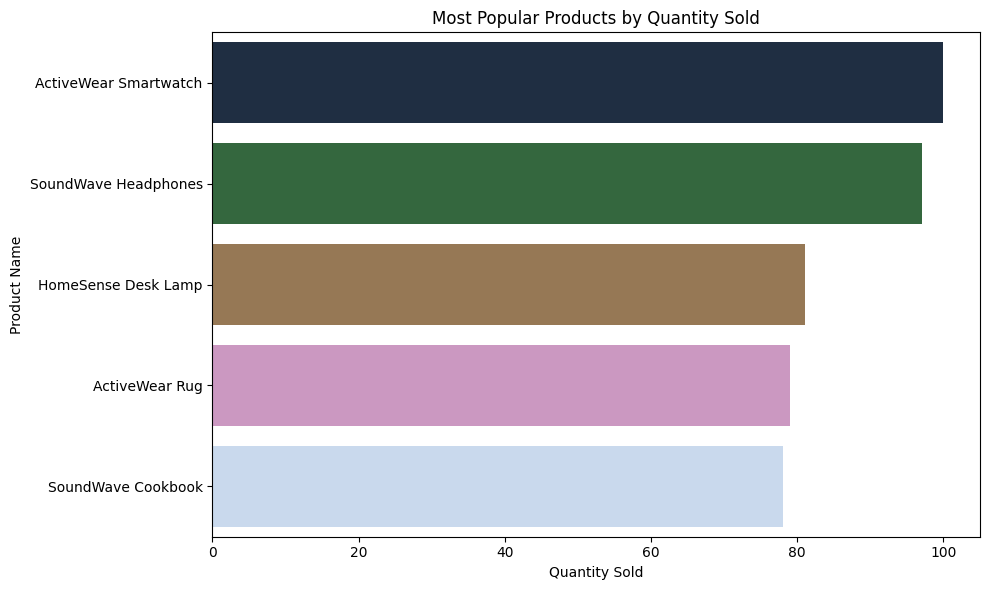

In [8]:
popular_products = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_products.values, y=popular_products.index, palette="cubehelix")
plt.title("Most Popular Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.savefig("popular_products.png")
plt.show()

## Creating a PDF

In [9]:
class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, "Business Insights Report", 0, 1, "C")
        self.ln(10)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, title, 0, 1, "L")
        self.ln(5)

    def chapter_body(self, body):
        self.set_font("Arial", "", 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path, title):
        self.add_page()
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, title, 0, 1, "C")
        self.ln(5)
        self.image(image_path, w=180)

pdf = PDFReport()

In [10]:
pdf.add_page()
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Exploratory Data Analysis and Business Insights", 0, 1, "C")
pdf.ln(10)


In [11]:
pdf.chapter_title("Top Insights:")
pdf.chapter_body(
    "1. Top Product Categories by Revenue:\n"
    f"   - 'Books' generates the highest revenue (${category_revenue.iloc[0]:,.2f}), followed by 'Electronics' and 'Clothing'.\n"
    "   - Focus on these categories to maximize profits.\n\n"
    "2. Regional Revenue Contribution:\n"
    f"   - 'South America' contributes the highest revenue (${region_revenue.iloc[0]:,.2f}).\n"
    "   - Europe and North America are also significant contributors.\n\n"
    "3. Customer Signup Trends:\n"
    f"   - Increasing trend in customer signups, with the highest in {data_signup_trend.idxmax()} ({data_signup_trend.max()} signups).\n"
    "   - Indicates successful customer acquisition strategies.\n\n"
    "4. Average Transaction Value by Region:\n"
    f"   - 'South America' has the highest average transaction value (${avg_transaction_value_region.iloc[0]:,.2f}).\n"
    "   - These regions exhibit high-value purchases.\n\n"
    "5. Most Popular Products by Quantity Sold:\n"
    f"   - Top 5 products: {', '.join(popular_products.index)}.\n"
    "   - Indicates consistent demand for these products."
)

# Add visualizations
pdf.add_image("category_revenue.png", "Top Product Categories by Revenue")
pdf.add_image("region_revenue.png", "Regional Revenue Contribution")
pdf.add_image("signup_trends.png", "Customer Signup Trends")
pdf.add_image("avg_transaction_value_region.png", "Average Transaction Value per Region")
pdf.add_image("popular_products.png", "Most Popular Products by Quantity Sold")

# Save the PDF
pdf.output("Siddhant_Gupta_EDA.pdf")

''